# Country-wise exploratory analysis

This is the exploratory analysis of the data focusing of countries.

## Assignment

The second task isto intimately acquaint yourself with the data, preprocess it and complete all the necessary descriptive statistics tasks. We expect you to have a pipeline in place, fully documented in a notebook, and show us that you’ve advanced with your understanding of the project goals by updating its README description.
When describing the data, in particular, you should show (non-exhaustive list):
- That you can handle the data in its size.
- That you understand what’s into the data (formats, distributions, missing values, correlations, etc.).
- That you considered ways to enrich, filter, transform the data according to your needs.
- That you have updated your plan in a reasonable way, reflecting your improved knowledge after data acquaintance. In particular, discuss how your data suits your project needs and discuss the methods you’re going to use, giving their essential mathematical details in the notebook.
- That your plan for analysis and communication is now reasonable and sound, potentially discussing alternatives to your choices that you considered but dropped.

We will evaluate this milestone according to how well these previous steps (or other reasonable ones) have been done and documented, the quality of the code and its documentation, the feasibility and critical awareness of the project.


## Data Documentation
According to the [official documentation](http://ucdp.uu.se/downloads/ged/ged171.pdf), the data represented in the dataset is:

Variable Name | Content|Type
---|:---|---
`id` |A unique numeric ID identifying each event| `integer`
`year`| The year of the event|`integer`
`active_year` |1: if the event belongs to an active conflict/dyad/actoryear<br> 0: otherwise| `Integer`
`type_of_violence`| Type of UCDP conflict:<br> 1 = state-based conflict<br> 2 = non-state conflict<br> 3 = one-sided violence| `integer`
`conflict_new_id` | A unique conflict identification code for each individual conflict in the dataset. | `integer`
`conflict_name` | Name of the UCDP conflict to which the event belongs.<br>For non-state conflicts and one-sided violence this is the same as the dyad name.|`string(9999)`
`dyad_new_id` | A unique conflict identification code for each individual `dyad` in the dataset. | `integer`
`dyad_name` | Name of the conflict `dyad` creating the event.<br>_A `dyad` is the pair of two actors engaged in violence (in the case of one-sided violence, the perpetrator of violence and civilians)._ <br> The two sides are separated by an ASCII dash (e.g. Government of Russia - Caucasus Emirate, Taleban - civilians). | `string(9999)`
`side_a_new_id` | A unique ID of side A. | `integer`
`gwnoa` |  The Gleditsch and Ward number for Side A if the side is a state. Empty if Side A is not a state. | `string(9999)`
`side_a` | The name of Side A in the `dyad`. In state-based conflicts always a government. In one-sided violence always the perpetrating party. | `string(9999)`
`side_b_new_id` | A unique ID of side B. |`integer`
`gwnob` | The Gleditsch and Ward number for Side B if the side is a state. Empty if Side B is not a state. |`string(9999)`
`side_b` | The name of Side B in the `dyad`. In state-based always the rebel movement or rivalling government. In onesided violence always "civilians". | `string(9999)`
`number_of_sources` | Number of total sources containing information for an event that were consulted. \* (for data $<$2013, `-1` | `integer`
`source_article` | References to the names, dates and titles of the source material from which information on the event is gathered. A reference to at least one source material is available for ALL EVENTS. This variable is highly streamlined for information collected since 2013, and is less so for older data. For such older data, abbreviations are sometimes used for source agencies. | `text`
`source_office` | The name of the organizations publishing the source materials. \* | `text`
`source_date` | The dates the source materials were published on. \* | `text`
`source_headline` | The titles of the source materials. Note that this variable is only available for data collected for 2013 and 2014, and for recently revised events. For older data, the field is empty. Note that an empty field does NOT mean information on the source is missing; reference to the source material is ALWAYS available in the source_article field, for every event. | `text`
`source_original` | The name or type of person or organization from which the information about the event originates in the original report. e.g. “police”, “Lt. Col. Johnson”, ”eyewitnesses”, “rebel spokesman”. | `string(9999)`
`where_prec` | The precision with which the coordinates and location assigned to the event reflects the location of the actual event (values 1-7 with decreasing precision, from precise point, to regional supra-country scale) | `integer`
`where_coordinates` | Name of the location to which the event is assigned. Fully standardized and normalized. |`string(9999)`
`adm_1` | Name of the first order (largest) administrative division where the event took place | `string(9999)`
`adm_2` | Name of the second order administrative division where the event took place | `string(9999)`
`latitude` | Latitude (in decimal degrees) | `numeric(9,6)`
`longitude` | Longitude (in decimal degrees) `numeric(9,6)`
`geom_wkt` | An Open Geospatial Consortium textual representation of the location of each individual point. Formatted as `OGC WKT (well known text)` without `SRID`. | `string(9999)`
`priogrid_gid` | The PRIO-grid cell `id (gid)` in which the event took place. Compatibility with PRIO-grid (Tollefsen, 2012) is guaranteed for both PRIO-grid 1 and 2. [...] | `integer`
`country` | Name of the country in which the event takes place.  | `string(999)`
`country_id` | `Gleditsch` and `Ward number` of the country in which the event takes place. | `integer`
`region` | Region where the event took place. One of following: {Africa, Americas, Asia, Europe, Middle East} | `string(999)`
`event_clarity`| 1 (high) for events where the reporting allows the coder to identify the event in full, 2 (lower) for events where an aggregation of information was already made by the source material that is impossible to undo in the coding process. Such events are described by the original source only as aggregates \*\* | `integer`
`date_prec` | How precise the information is about the date of an event. 1 (exact date of event is known) to 5 (the date of the event is known only within a rangelonger than one month but not more than one calendar year.) \*\* | `integer`
`date_start` | The earliest possible date when the event has taken place. | `Date YYYY-MMDD`
`date_end` | The last possible date when the event has taken place. | `Date YYYY-MMDD`
`deaths_a`| The best estimate of deaths sustained by side a. Always 0 for one-sided violence events. | `integer`
`deaths_b` | The best estimate of deaths sustained by side b. Always 0 for one-sided violence events. | `integer`
`deaths_civilians` | The best estimate of dead civilians in the event. For non-state or state-based events, this is the number of collateral damage resulting in fighting between side a and side b. For one-sided violence, it is the number of civilians killed by side a. | `integer`
`deaths_unknown` | The best estimate of deaths of persons of unknown status. | `integer`
`best_est` | The best (most likely) estimate of total fatalities resulting from an event. It is always the sum of `deaths_a`, `deaths_b`, `deaths_civilians` and `deaths_unknown`. | `integer`
`high_est` | The highest reliable estimate of total fatalities  | `integer`
`low_est` | The lowest reliable estimate of total fatalities | `integer`
`geom / geometry` | An Open Geospatial Consortium / ESRI binary representation of each individual point. Contains the SRID (4326) where supported. Due to the binary nature of this variable, this variable is contained only in the formats that support it. | `geometry (Point,4326)` 



**\*Note that this variable is only available for data collected since 2013, and for recently revised events. For older
data, the field is empty. Note that an empty field does NOT mean information on the source is missing; reference to the source material is ALWAYS available in the source_article field, for every event.**

**\*\*[Full documentation available online](http://ucdp.uu.se/downloads/ged/ged171.pdf).**

More details of backward- and cross-compatility of the data with other and older datasets is given on the [documentation](http://ucdp.uu.se/downloads/ged/ged171.pdf).

Needless to say, the sheer amount of columns is overwhelming. At a first glance, the data seems fairly well-documented and an effort for systematic archiving and reliability checking of sources seems to have been made. Nonetheless, it seems chaotic to throw that much data in one huge table. Therefore, we suggest doing two things:
1. Analyzing all data columns individually
2. Identifying the most important columns
3. Defining a new, coherent data model to which we want to convert the table.

# 1. Data Analysis

First, we import the data:

In [70]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import folium
import json
import branca.colormap as bcm
import numpy as np
import ipywidgets as widgets
from ipywidgets import interact, fixed
from folium.plugins import MarkerCluster

from plots import * # mapping functions in separate Python file helpers.py / plot.py because it hinders the reading flow.

In [14]:
df = pd.read_csv('../data/ged171.csv')

#### Basic statistics
First, some basic statistics:

In [39]:
print(df.shape)
print(df.columns)

(135181, 42)
Index(['id', 'year', 'active_year', 'type_of_violence', 'conflict_new_id',
       'conflict_name', 'dyad_new_id', 'dyad_name', 'side_a_new_id', 'gwnoa',
       'side_a', 'side_b_new_id', 'gwnob', 'side_b', 'number_of_sources',
       'source_article', 'source_office', 'source_date', 'source_headline',
       'source_original', 'where_prec', 'where_coordinates', 'adm_1', 'adm_2',
       'latitude', 'longitude', 'geom_wkt', 'priogrid_gid', 'country',
       'country_id', 'region', 'event_clarity', 'date_prec', 'date_start',
       'date_end', 'deaths_a', 'deaths_b', 'deaths_civilians',
       'deaths_unknown', 'best', 'low', 'high'],
      dtype='object')


We have 135'181 rows, and 42 columns. We can now analyze some of the data fields seeming most important, under the following angles:
- Meaning
- Missing data
- Inter-Linkages with other fields
- Possible inconsistencies

#### Year of conflict

Variable Name | Content|Type
---|:---|---
`year`| The year of the event|`integer`
`active_year` |1: if the event belongs to an active conflict/dyad/actoryear<br> 0: otherwise| `Integer`

In [40]:
print(df.drop_duplicates('year')['year'].sort_values().values)
print(df.drop_duplicates('active_year')['active_year'].sort_values().values)

[1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003
 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016]
[0 1]


There are conflicts in all years from 1989 to 2016. `active_year` contains 0 and 1 values, as indicated. 

#### Conflict name

Variable Name | Content|Type
---|:---|---
`conflict_name` | Name of the UCDP conflict to which the event belongs.<br>For non-state conflicts and one-sided violence this is the same as `dyad_name`.|`string(9999)`

In [41]:
df.conflict_name.values[:10]

array(['Yemen (North Yemen):Government',
       'Government of Yemen (North Yemen) - Civilians',
       'Yemen (North Yemen):Government', 'Yemen (North Yemen):Government',
       'Yemen (North Yemen):Government', 'Yemen (North Yemen):Government',
       'Yemen (North Yemen):South Yemen',
       'Yemen (North Yemen):South Yemen',
       'Yemen (North Yemen):South Yemen', 'Yemen (North Yemen):Government'], dtype=object)

This field could probably nee a lot of cleanup. It could for instance be better to have two fields (party one, party two), containing indexes referring to the values in a separate table `parties`.

#### `dyad`: Name of the conflict creating the event

Variable Name | Content|Type
---|:---|---
`dyad_new_id` | A unique conflict identification code for each individual `dyad` in the dataset. | `integer`
`dyad_name` | Name of the conflict `dyad` creating the event.<br>_A `dyad` is the pair of two actors engaged in violence (in the case of one-sided violence, the perpetrator of violence and civilians)._ <br> The two sides are separated by an ASCII dash (e.g. Government of Russia - Caucasus Emirate, Taleban - civilians). | `string(9999)`
    `dyad_new_id` | A unique conflict identification code for each individual `dyad` in the dataset. | `integer`
`side_a_new_id` | A unique ID of side A. | `integer`
`gwnoa` |  The Gleditsch and Ward number for Side A if the side is a state. Empty if Side A is not a state. | `string(9999)`
`side_a` | The name of Side A in the `dyad`. In state-based conflicts always a government. In one-sided violence always the perpetrating party. | `string(9999)`
`side_b_new_id` | A unique ID of side B. |`integer`
`gwnob` | The Gleditsch and Ward number for Side B if the side is a state. Empty if Side B is not a state. |`string(9999)`
`side_b` | The name of Side B in the `dyad`. In state-based always the rebel movement or rivalling government. In onesided violence always "civilians". | `string(9999)`

The `dyad_new_id` and `dyad_name` fields seem strange and hard to understand. Let's visualize some values to get an idea of what is meant by them:

In [52]:
print("df.dyad_new_id is unique: " + str(df.dyad_new_id.is_unique))
print("Some examples of dyad_name: ")
print(df.drop_duplicates('dyad_name')['dyad_name'].sort_values().values[:20])
print(df.drop_duplicates('side_a')['side_a'].sort_values().values[:20])
print(df.drop_duplicates('side_b')['side_b'].sort_values().values[:20])
print(df['side_a_new_id'].is_unique) 
print(df['side_b_new_id'].is_unique)

df.dyad_new_id is unique: False
Some examples of dyad_name: 
['1920 Revolution Brigades - IS' '3R - Civilians' 'AAH - Civilians'
 'ABSU - Civilians' 'ADF - Civilians' 'ADP - Civilians' 'AFDL - ALiR'
 'AFDL - Civilians' 'AFDL - Mayi Mayi' 'AFRC - Civilians' 'AIAI - SSDF'
 'AIS - GIA' 'AJPSN - Civilians' 'ALiR - Civilians' 'ALiR - Palipehutu-FNL'
 'ALiR, CNDD-FDD , Mayi Mayi - RCD' 'ALiR, Mayi Mayi - RCD'
 'AMB - Civilians' "ANC - 'Greens'  - ANC - 'Reds' " 'ANC - Civilians']
['1920 Revolution Brigades' '3R' 'AAH' 'ABSU' 'ADF' 'ADP' 'AFDL' 'AFRC'
 'AIAI' 'AIS' 'AJPSN' 'ALiR' 'ALiR, CNDD-FDD , Mayi Mayi' 'ALiR, Mayi Mayi'
 'AMB' 'ANC' "ANC - 'Greens' " 'APCLS' 'APCLS, FDLR, Nyatura' 'AQAP']
['ABSDF' 'ABSU' 'ADF' 'AFDL' 'AFL, LPC, ULIMO - J' 'AFRC' 'AIAI' 'AIS'
 'ALiR' 'AMB' 'AN ' "ANC - 'Reds' " 'APCLS' 'APF' 'AQAP' 'ARDUF' 'ARS/UIC'
 'ASG' 'ATNMC' 'ATTF']
False


Again, `dyad_name` could be cleaned up and is actually redundant since we have it in `side_a` and `side_b`. `side_a` and `side_b` could both be transformed to indexes referring to a unique party in `parties` simply (or make them categorical simply).

`side_a_new_id` and `side_b_new_id` are not unique, are just ids to some other (inexistent) table containing the side's names.

#### Sources
TODO verify the correctness and properties of sources as done above

Variable Name | Content|Type
---|:---|---
`number_of_sources` | Number of total sources containing information for an event that were consulted. \* (for data $<$2013, `-1` | `integer`
`source_article` | References to the names, dates and titles of the source material from which information on the event is gathered. A reference to at least one source material is available for ALL EVENTS. This variable is highly streamlined for information collected since 2013, and is less so for older data. For such older data, abbreviations are sometimes used for source agencies. | `text`
`source_office` | The name of the organizations publishing the source materials. \* | `text`
`source_date` | The dates the source materials were published on. \* | `text`
`source_headline` | The titles of the source materials. Note that this variable is only available for data collected for 2013 and 2014, and for recently revised events. For older data, the field is empty. Note that an empty field does NOT mean information on the source is missing; reference to the source material is ALWAYS available in the source_article field, for every event. | `text`
`source_original` | The name or type of person or organization from which the information about the event originates in the original report. e.g. “police”, “Lt. Col. Johnson”, ”eyewitnesses”, “rebel spokesman”. | `string(9999)`
`where_prec` | The precision with which the coordinates and location assigned to the event reflects the location of the actual event (values 1-7 with decreasing precision, from precise point, to regional supra-country scale) | `integer`


#### Geographic Location and formats
TODO verify the correctness and properties of the different geographic formats used to store the data.

Variable Name | Content|Type
---|:---|---
`where_prec` | The precision with which the coordinates and location assigned to the event reflects the location of the actual event (values 1-7 with decreasing precision, from precise point, to regional supra-country scale) | `integer`
`where_coordinates` | Name of the location to which the event is assigned. Fully standardized and normalized. |`string(9999)`
`adm_1` | Name of the first order (largest) administrative division where the event took place | `string(9999)`
`adm_2` | Name of the second order administrative division where the event took place | `string(9999)`
`latitude` | Latitude (in decimal degrees) | `numeric(9,6)`
`longitude` | Longitude (in decimal degrees) `numeric(9,6)`
`geom_wkt` | An Open Geospatial Consortium textual representation of the location of each individual point. Formatted as `OGC WKT (well known text)` without `SRID`. | `string(9999)`
`priogrid_gid` | The PRIO-grid cell `id (gid)` in which the event took place. Compatibility with PRIO-grid (Tollefsen, 2012) is guaranteed for both PRIO-grid 1 and 2. [...] | `integer`

#### Countries
The represented countries are:

Variable Name | Content|Type
---|:---|---
`country` | Name of the country in which the event takes place.  | `string(999)`
`country_id` | `Gleditsch` and `Ward number` of the country in which the event takes place. | `integer`
`region` | Region where the event took place. One of following: {Africa, Americas, Asia, Europe, Middle East} | `string(999)`

In [53]:
countries = df.drop_duplicates('country')['country'].sort_values().values
countries

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Armenia', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Belgium',
       'Bhutan', 'Bolivia', 'Bosnia-Herzegovina', 'Botswana', 'Brazil',
       'Burkina Faso', 'Burundi', 'Cambodia (Kampuchea)', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'China', 'Colombia',
       'Comoros', 'Congo', 'Croatia', 'DR Congo (Zaire)', 'Djibouti',
       'Ecuador', 'Egypt', 'El Salvador', 'Eritrea', 'Ethiopia', 'France',
       'Georgia', 'Germany', 'Ghana', 'Guatemala', 'Guinea',
       'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'India',
       'Indonesia', 'Iran', 'Iraq', 'Israel', 'Italy', 'Ivory Coast',
       'Jamaica', 'Jordan', 'Kenya', 'Kuwait', 'Kyrgyzstan', 'Laos',
       'Lebanon', 'Lesotho', 'Liberia', 'Libya', 'Macedonia, FYR',
       'Madagascar (Malagasy)', 'Malaysia', 'Mali', 'Malta', 'Mauritania',
       'Mexico', 'Moldova', 'Morocco', 'Mozambique', 'Myanmar (Burma)',
       'Namibia', 'Nepal',

- Rwanda has been the most devasted country in count of civilian deaths (500k in 1991)
- Then comes the Democratic Republic of Congo (Zaire) with 30k in 1996

TODO look also at regions

#### Event confidence, dates
TODO analyze as above

Variable Name | Content|Type
---|:---|---
`event_clarity`| 1 (high) for events where the reporting allows the coder to identify the event in full, 2 (lower) for events where an aggregation of information was already made by the source material that is impossible to undo in the coding process. Such events are described by the original source only as aggregates \*\* | `integer`

#### Dates
TODO analyze as above

Variable Name | Content|Type
---|:---|---
`date_prec` | How precise the information is about the date of an event. 1 (exact date of event is known) to 5 (the date of the event is known only within a rangelonger than one month but not more than one calendar year.) \*\* | `integer`
`date_start` | The earliest possible date when the event has taken place. | `Date YYYY-MMDD`
`date_end` | The last possible date when the event has taken place. | `Date YYYY-MMDD`

#### Deaths

Variable Name | Content|Type
---|:---|---
`deaths_a`| The best estimate of deaths sustained by side a. Always 0 for one-sided violence events. | `integer`
`deaths_b` | The best estimate of deaths sustained by side b. Always 0 for one-sided violence events. | `integer`
`deaths_civilians` | The best estimate of dead civilians in the event. For non-state or state-based events, this is the number of collateral damage resulting in fighting between side a and side b. For one-sided violence, it is the number of civilians killed by side a. | `integer`
`deaths_unknown` | The best estimate of deaths of persons of unknown status. | `integer`
`best_est` | The best (most likely) estimate of total fatalities resulting from an event. It is always the sum of `deaths_a`, `deaths_b`, `deaths_civilians` and `deaths_unknown`. | `integer`
`high_est` | The highest reliable estimate of total fatalities  | `integer`
`low_est` | The lowest reliable estimate of total fatalities | `integer`
`geom / geometry` | An Open Geospatial Consortium / ESRI binary representation of each individual point. Contains the SRID (4326) where supported. Due to the binary nature of this variable, this variable is contained only in the formats that support it. | `geometry (Point,4326)` 


TODO why is `geom / geometry` on bottom in documentation? Put in 'geographic format and locations' (above)?

# Exploratory axes:
- Analyze precision of the data using features such as `date_prec`, `event_clarity`
- Compare civilian deaths in norh versus south (enrich data set with a label of developped or not country)
- Compare evolution of events type-wise (government or civil or terror)
- Compare number of events in each conflicts

## Map Visualization

- **TODO** explain what we are doing here, step-by-step

Import some json data for the entire world:

In [62]:
topo_path = '../data/topojson-master/world-countries-sans-antarctica.json'
topo_data = json.load(open(topo_path))

Plotting: get all centroids, assing country names to code in topojson:

In [63]:
centro = pd.read_csv('../data/country_centroids_primary.csv', sep=('\t')).loc[:, ['LAT', 'LONG', 'SHORT_NAME']]
centro.columns = ['lat', 'long', 'name']

## Actors involved in each country

In [69]:
d = dict()
for i in countries:
    s = set()
    tmp = df.loc[df.country == i]
    s = s.union(set(tmp.loc[:,'side_a'].values))
    s = s.union(set(tmp.loc[:,'side_b'].values))
    d[i] = s

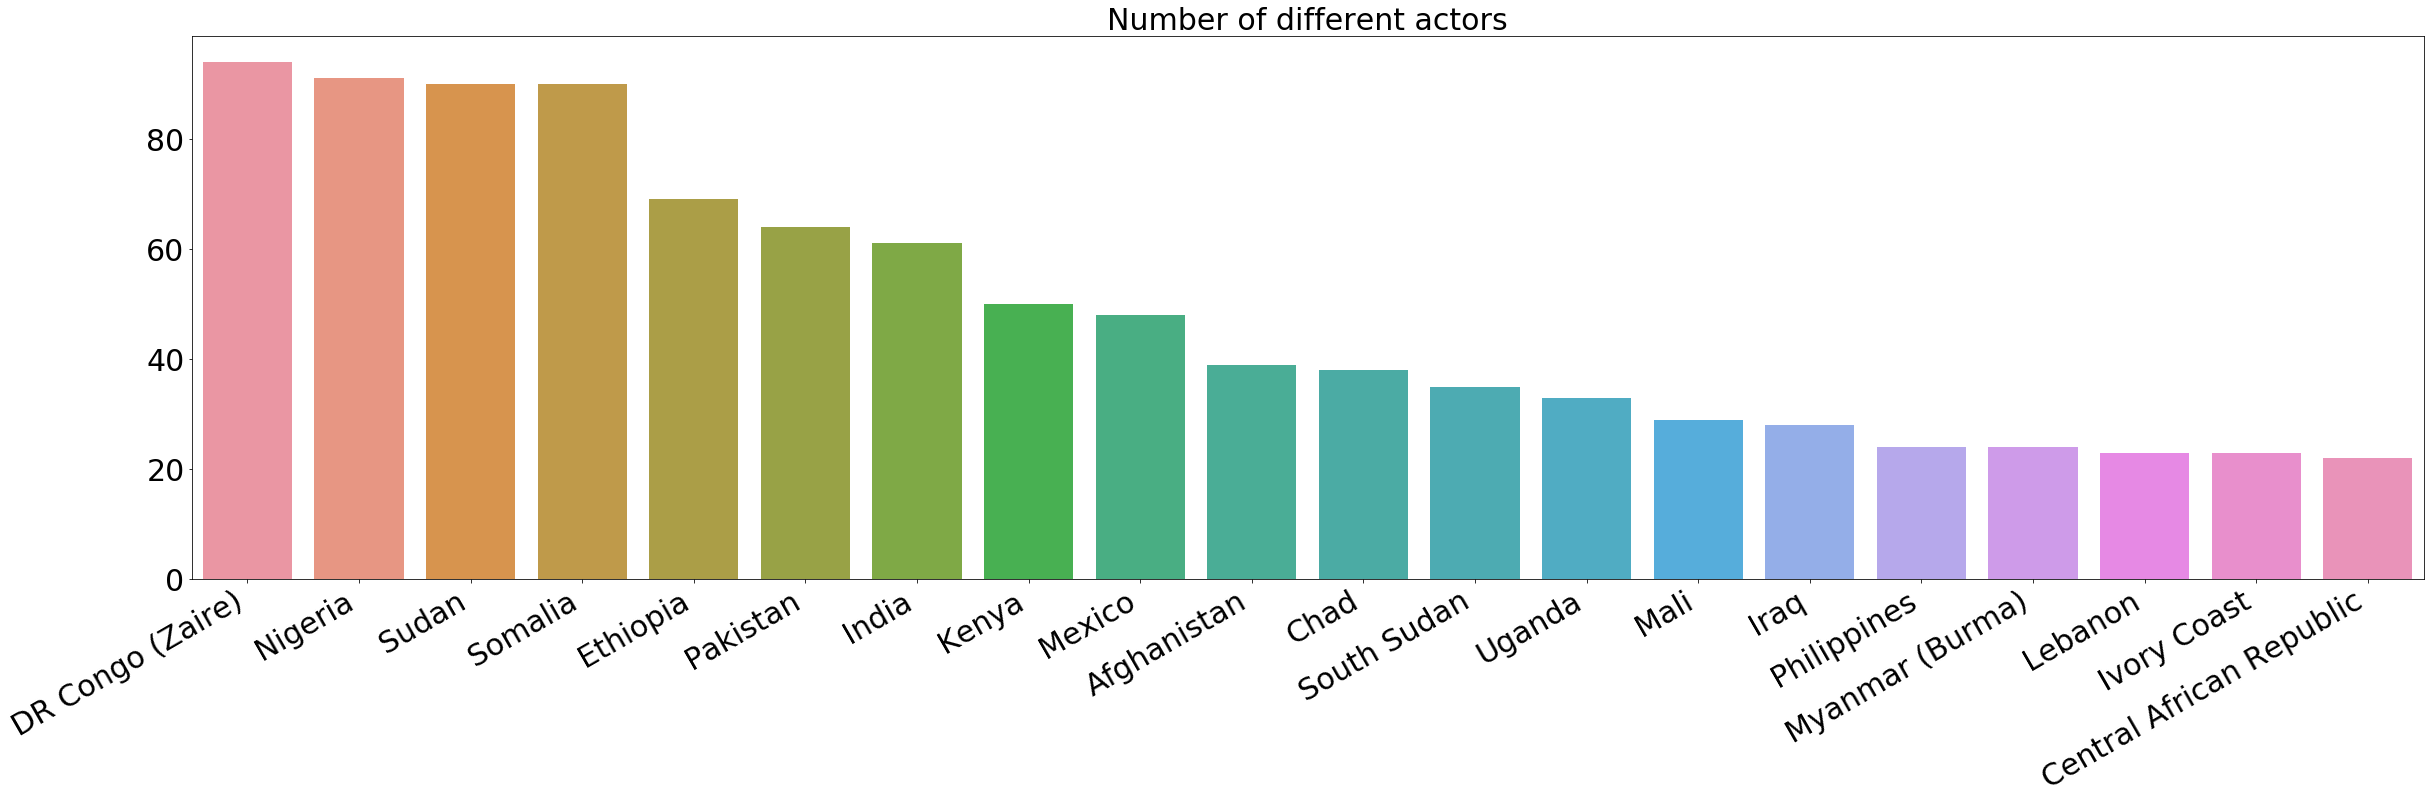

In [11]:
x = list(d.keys())
y = [i for i in map(lambda x: len(x), d.values())]
y, x = zip(*sorted(zip(y, x), reverse=True))
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(40,10))
sns.barplot(x=x[0:20], y=y[0:20], ax=ax)
ax.set_xticklabels(x[0:20], rotation=30, horizontalalignment='right', fontsize=30)
ax.set_yticklabels([0, 20, 40, 60, 80], fontsize=30)
ax.set_title('Number of different actors', fontsize=30)
plt.show()

## Civilian deaths in each countries

In [12]:
year_country = df.groupby(['country', 'year'])['deaths_civilians'].sum()
tmp = pd.DataFrame(year_country)
cv_deaths = pd.DataFrame(index=countries, columns=df.drop_duplicates('year')['year'].sort_values().values)
cv_deaths.fillna(value=0, inplace=True)

for i in tmp.index:
    cv_deaths.loc[i[0], i[1]] = tmp.loc[i].values

cv_deaths.head()

,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Afghanistan,303,101,49,1695,637,120,185,483,353,6341,...,669,763,1099,1178,1024,908,930,876,899,1076
Albania,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Algeria,0,0,1,5,37,30,15,9,361,143,...,31,58,48,26,17,23,27,1,1,0
Angola,297,191,212,32,761,304,56,1,45,214,...,1,1,0,6,0,0,0,0,0,1
Argentina,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


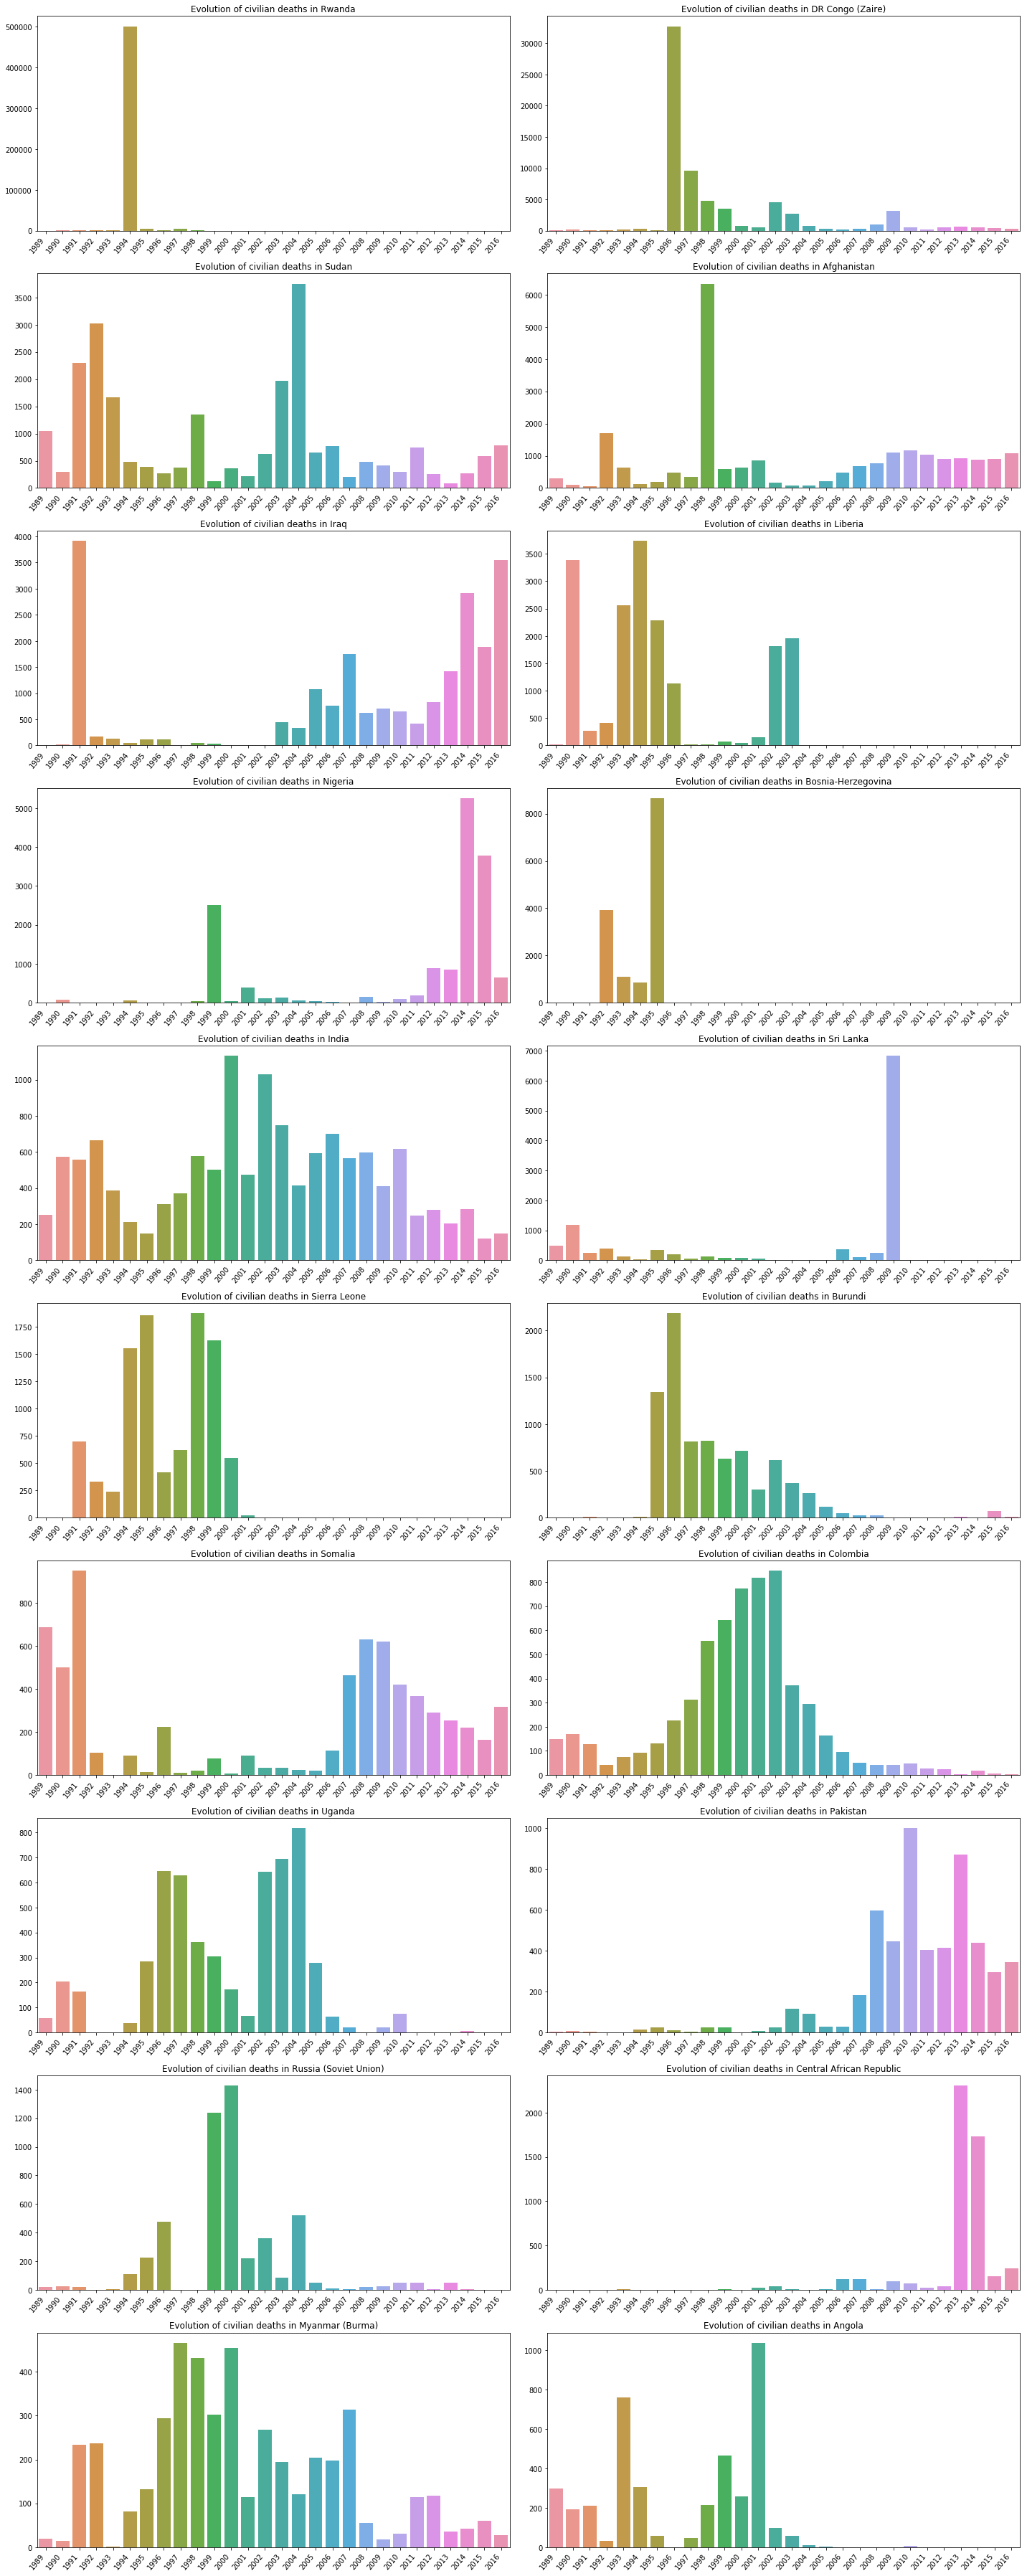

In [13]:
fig, ax = plt.subplots(nrows=10, ncols=2, figsize=(20,50))
for i, name in enumerate(reversed(cv_deaths.sum(axis=1).sort_values().index[-20:])):
    sns.barplot(x=cv_deaths.columns, y=cv_deaths.loc[name].values, ax=ax[i//2, i%2])
    ax[i//2, i%2].set_xticklabels(cv_deaths.columns, rotation=50, horizontalalignment='right')
    ax[i//2, i%2].set_title('Evolution of civilian deaths in {}'.format(name))
plt.tight_layout()
plt.show()

In [15]:
tmp = insert_code(cv_deaths, topo_data)

In [ ]:
interact(build_map, df=fixed(tmp), topo_data=fixed(topo_data), centro=fixed(centro), legend=fixed('civilian deaths'),
         year=widgets.IntSlider(min=1989, max=2016, step=1,value=1989))

Event counts for each country:

In [14]:
df['event'] = 1
tmp = pd.DataFrame(df.groupby(['country', 'year'])['event'].sum())
events_count = pd.DataFrame(index=countries, columns=df.drop_duplicates('year')['year'].sort_values().values)
events_count.fillna(value=0, inplace=True)

for i in tmp.index:
    events_count.loc[i[0], i[1]] = tmp.loc[i].values

In [15]:
tmp = insert_code(events_count, topo_data)

In [ ]:
interact(build_map, df=fixed(tmp), topo_data=fixed(topo_data), centro=fixed(centro), legend=fixed('events'),
         year=widgets.IntSlider(min=1989, max=2016, step=1,value=1989))

# Bar Charts

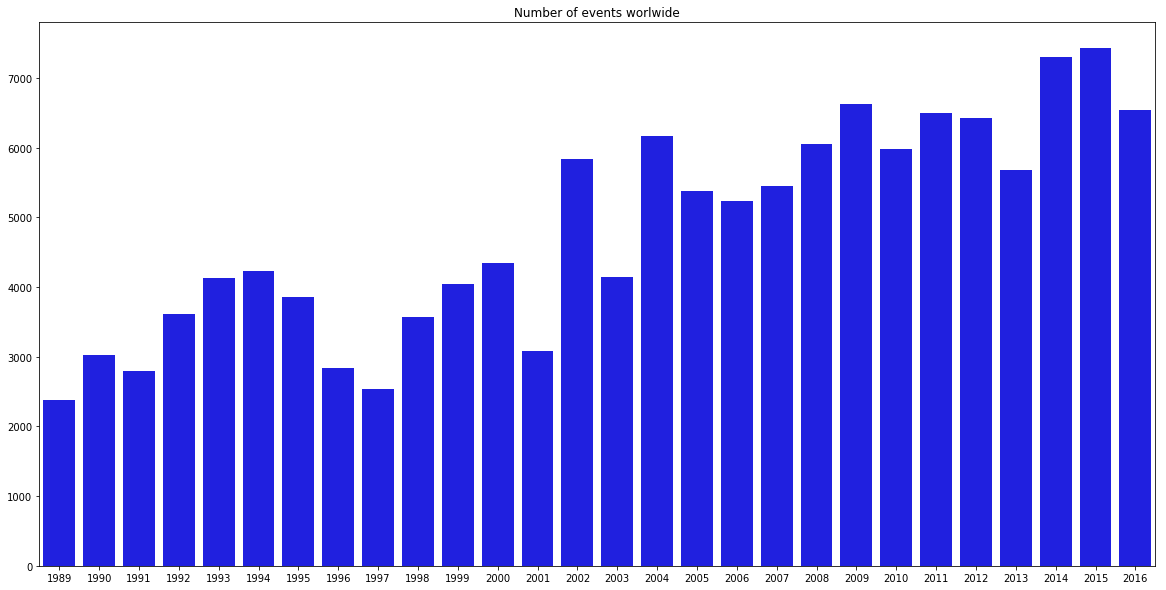

In [16]:
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(x=events_count.sum().index, y=events_count.sum().values, ax=ax, color='blue')
ax.set_title('Number of events worlwide')
plt.show()

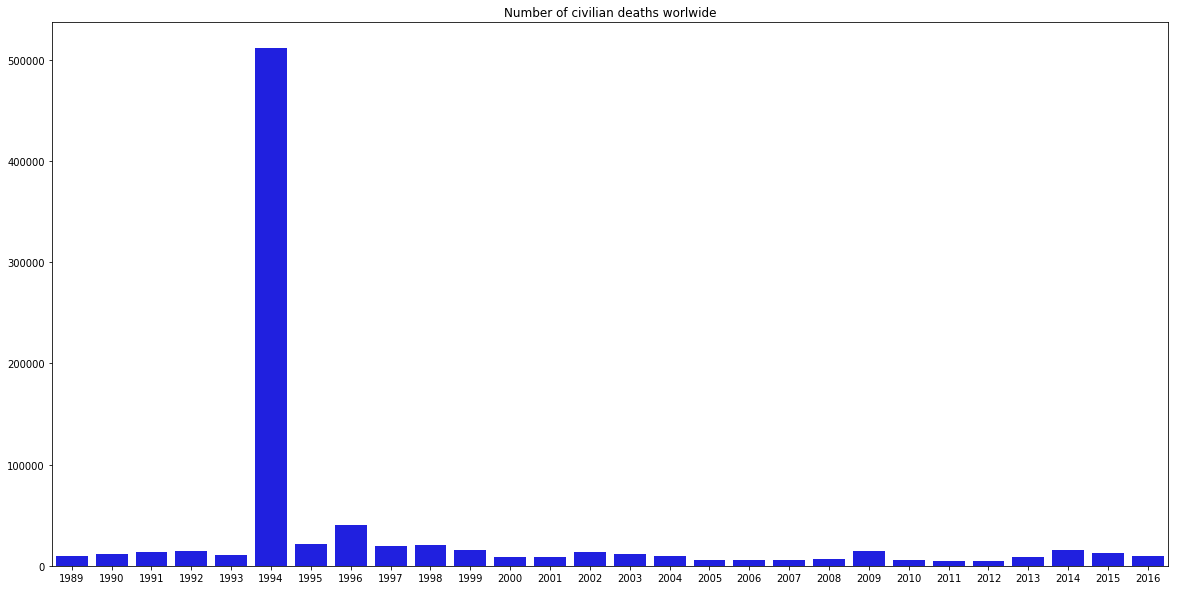

In [17]:
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(x=cv_deaths.sum().index, y=cv_deaths.sum().values, ax=ax, color='blue')
ax.set_title('Number of civilian deaths worlwide')
plt.show()

# Compare evolution of events type-wise (government or civil or terror)

In [67]:
lol = pd.DataFrame(df.loc[df.type_of_violence == 1].groupby('year').sum().loc[:, 'event'])
lol['type'] = 1
lol.reset_index(inplace=True)
tmp = pd.DataFrame(df.loc[df.type_of_violence == 2].groupby('year').sum().loc[:, 'event'])
tmp['type'] = 2
tmp.reset_index(inplace=True)
lol = lol.append(tmp)
tmp = pd.DataFrame(df.loc[df.type_of_violence == 3].groupby('year').sum().loc[:, 'event'])
tmp['type'] = 3
tmp.reset_index(inplace=True)
lol = lol.append(tmp)
lol.reset_index(inplace=True, drop=True)

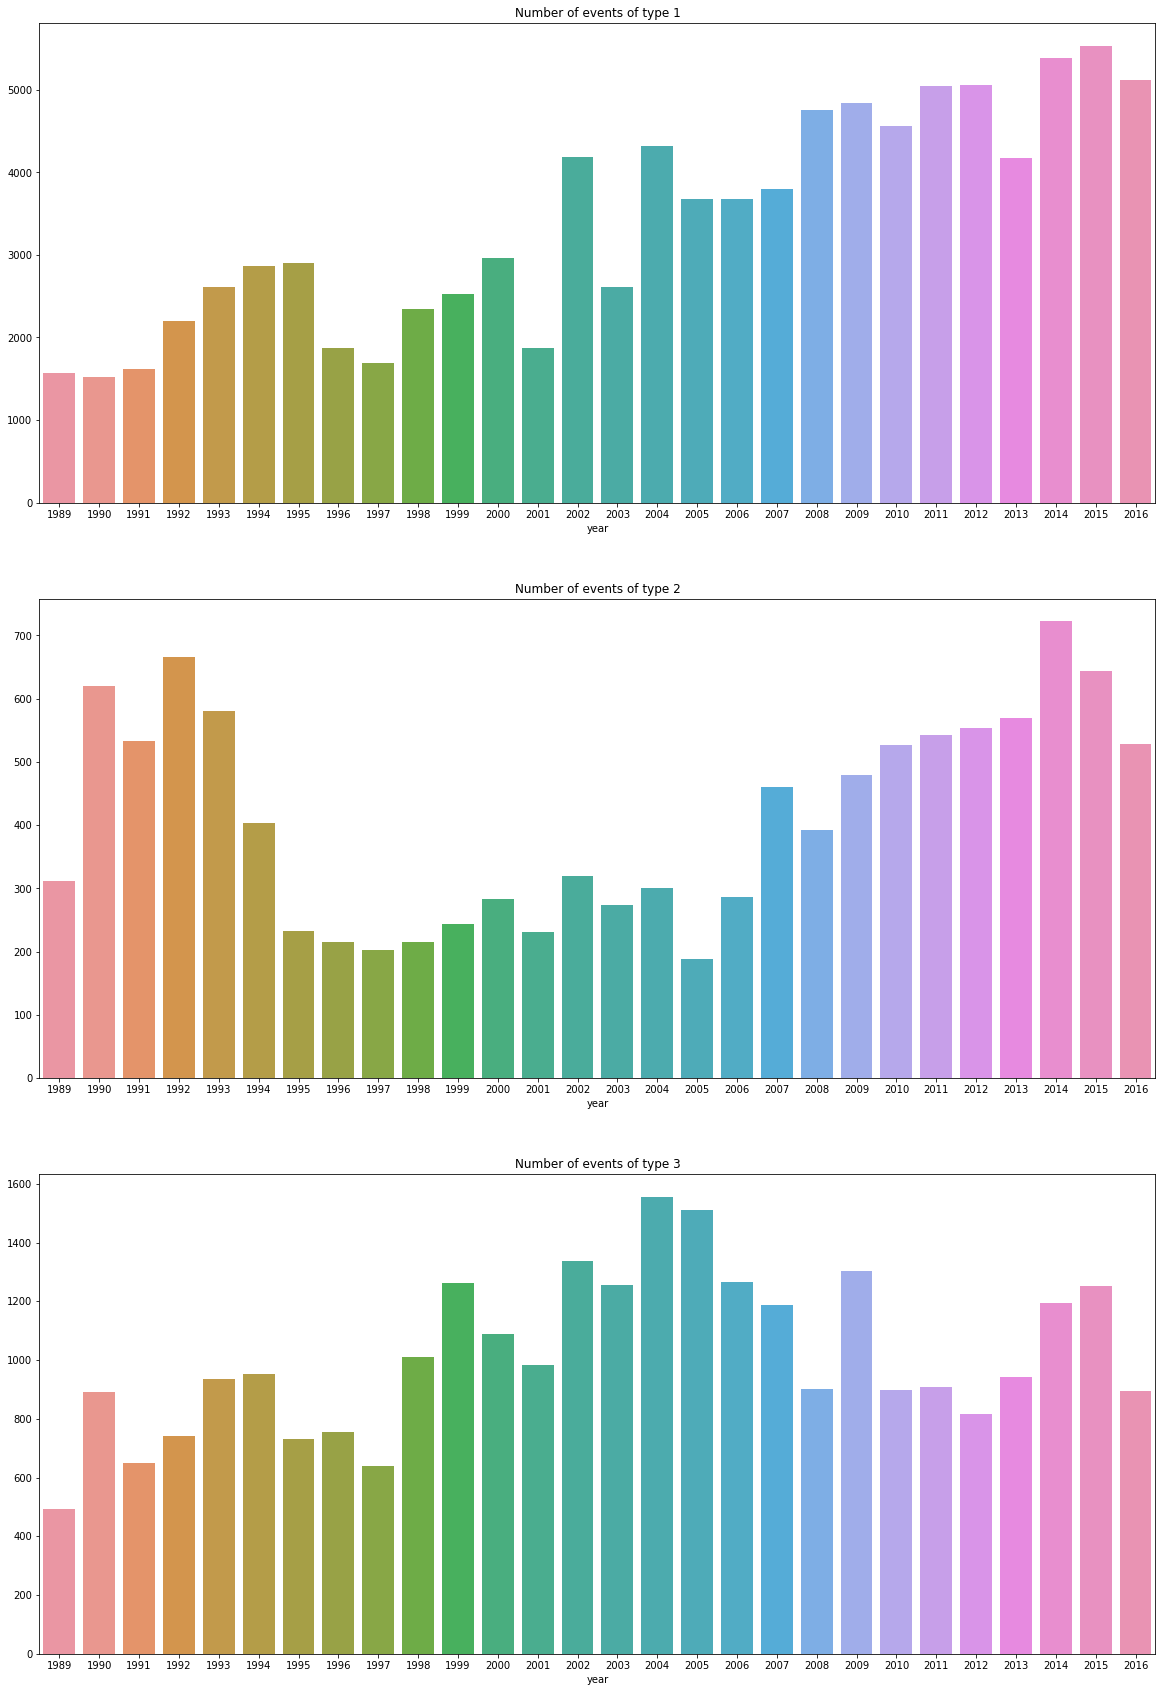

In [68]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(20,30))
for i in range(3):
    sns.barplot(x = df.loc[df.type_of_violence == i+1].groupby('year').sum().loc[:, 'event'].index,
                y = df.loc[df.type_of_violence == i+1].groupby('year').sum().loc[:, 'event'].values, 
                ax=ax[i])
    ax[i].set_title('Number of events of type {}'.format(i+1))
plt.show()

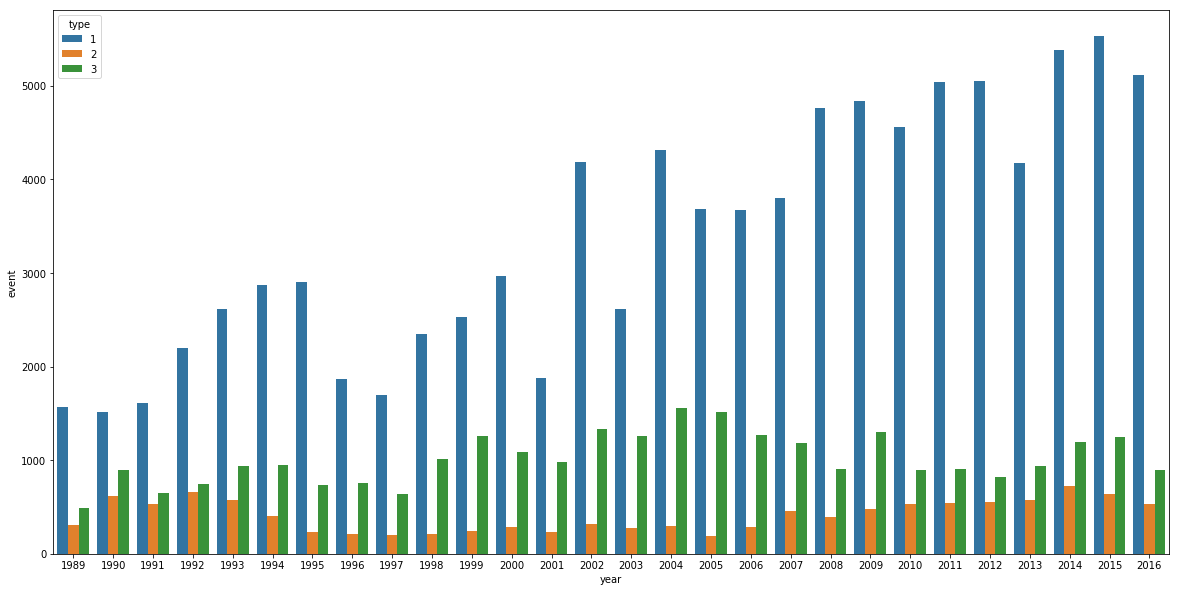

In [72]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.barplot(data=lol, x='year', y='event', hue='type', ax=ax)
plt.show()

Type 1 violence seems to increase (actually the number of events increases).
Type 2 and 3 are fluctuent but there is no real trend.

## Events per conflict

In [92]:
d = {}
tmp = df.groupby('conflict_new_id').sum()['event'].sort_values(ascending=False)

for i in tmp.index:
    d[list(df.loc[df.conflict_new_id == i, 'dyad_name'])[0]] = tmp[i]

In [102]:
events_per_conflict = pd.DataFrame(d, index=range(len(d))).loc[0].sort_values(ascending=False)
events_per_conflict

Government of Afghanistan - Taleban                                                            21069
Government of India - Kashmir insurgents                                                        5763
Government of Iraq - IS                                                                         4660
Government of Turkey - PKK                                                                      4364
Government of Sri Lanka - LTTE                                                                  4011
Government of Algeria - GIA                                                                     3763
Government of Nepal - CPN-M                                                                     3699
Government of Pakistan - TTP                                                                    3597
Government of Colombia - FARC                                                                   3394
Government of Somalia - Al-Shabaab                                                         

## Deaths per conflict

In [115]:
df.groupby('conflict_new_id').sum().columns

Index(['id', 'year', 'active_year', 'type_of_violence', 'dyad_new_id',
       'side_a_new_id', 'gwnoa', 'side_b_new_id', 'gwnob', 'number_of_sources',
       'where_prec', 'latitude', 'longitude', 'priogrid_gid', 'country_id',
       'event_clarity', 'date_prec', 'deaths_a', 'deaths_b',
       'deaths_civilians', 'deaths_unknown', 'best', 'low', 'high', 'event'],
      dtype='object')

In [116]:
d = {}
tmp = df.groupby('conflict_new_id').sum()['best'].sort_values(ascending=False)

for i in tmp.index:
    d[list(df.loc[df.conflict_new_id == i, 'dyad_name'])[0]] = tmp[i]

total_death_per_conflict = pd.DataFrame(d, index=range(len(d))).loc[0].sort_values(ascending=False)
total_death_per_conflict

Government of Rwanda - Civilians                                                                  511531
Government of Afghanistan - Taleban                                                               162045
Government of Eritrea - Government of Ethiopia                                                     97435
Government of Sri Lanka - LTTE                                                                     60816
Government of Iraq - IS                                                                            52501
Government of Sudan - SPLM/A                                                                       48938
Government of Ethiopia - EPLF                                                                      43470
Government of Ethiopia - EPRDF                                                                     41908
AFDL - Civilians                                                                                   35126
Government of Angola - UNITA                           

## Victims of the Islamic State

In [110]:
df.loc[df.dyad_name == 'IS - Civilians'].groupby('country').sum()['deaths_civilians'].sort_values(ascending=False)

country
Iraq                        11779
Nigeria                      2877
Cameroon                      412
Egypt                         256
France                        217
Afghanistan                   201
Turkey                        198
Niger                         179
Pakistan                      164
Libya                         127
Chad                          111
Tunisia                        59
Jordan                         59
Bangladesh                     37
Saudi Arabia                   33
Belgium                        32
Kuwait                         26
United States of America       14
Germany                        12
Lebanon                         5
Russia (Soviet Union)           3
Yemen (North Yemen)             3
Name: deaths_civilians, dtype: int64

Further work:
- Try to reproduce, critically analyze and improve the statistics of the [UCPD website](http://ucdp.uu.se/)
- Take the documentation table from above, extract relevant entities in an E-R model and implement the new data model.